In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/data_pl_2016-2019.csv')

In [4]:
df.head()

,Time,Temperature,Demand,Day_of_week,Workday,Saturday,Sunday,Workday_after_nonWork,NonWeekend_holiday
0,2016-01-01 00:00:00,-8.731,15066200.0,Fri,False,False,False,False,True
1,2016-01-01 01:00:00,-8.784,14486775.0,Fri,False,False,False,False,True
2,2016-01-01 02:00:00,-8.797,13841413.0,Fri,False,False,False,False,True
3,2016-01-01 03:00:00,-8.851,13375913.0,Fri,False,False,False,False,True
4,2016-01-01 04:00:00,-8.904,13163563.0,Fri,False,False,False,False,True


In [5]:
df['Load [GW]'] = df['Demand']/10**6
df['Temperature [C]'] = df['Temperature']

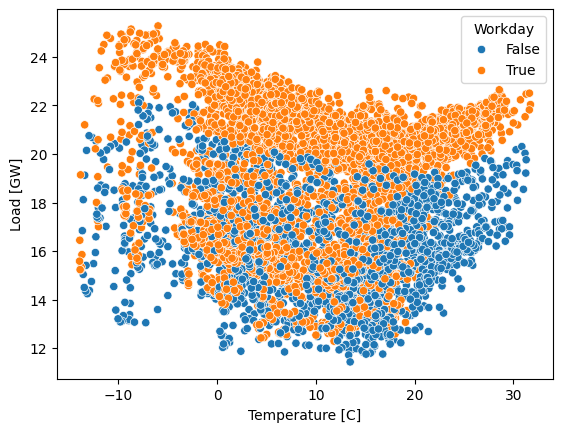

In [6]:
sns.scatterplot(x='Temperature [C]',y='Load [GW]'
                , hue='Workday'
                ,data=df[0:7000]
                #,palette='muted'
                )
plt.savefig('./plots/PL_temper_load.pdf', format='pdf')

In [7]:
dfplot = df[0:7000]

dfplot[df['Workday'] == True]

C:\Users\Altafloresta\AppData\Local\Temp\ipykernel_24140\3522324342.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfplot[df['Workday'] == True]


,Time,Temperature,Demand,Day_of_week,Workday,Saturday,Sunday,Workday_after_nonWork,NonWeekend_holiday,Load [GW],Temperature [C]
72,2016-01-04 00:00:00,-13.683,15852788.0,Mon,True,False,False,True,False,15.852788,-13.683
73,2016-01-04 01:00:00,-13.754,15339013.0,Mon,True,False,False,True,False,15.339013,-13.754
74,2016-01-04 02:00:00,-13.818,15219638.0,Mon,True,False,False,True,False,15.219638,-13.818
75,2016-01-04 03:00:00,-13.865,15233300.0,Mon,True,False,False,True,False,15.233300,-13.865
76,2016-01-04 04:00:00,-13.920,15583425.0,Mon,True,False,False,True,False,15.583425,-13.920
...,...,...,...,...,...,...,...,...,...,...,...
6995,2016-10-18 11:00:00,10.092,22492163.0,Tue,True,False,False,False,False,22.492163,10.092
6996,2016-10-18 12:00:00,10.369,22555288.0,Tue,True,False,False,False,False,22.555288,10.369
6997,2016-10-18 13:00:00,10.307,22061013.0,Tue,True,False,False,False,False,22.061013,10.307
6998,2016-10-18 14:00:00,9.814,21784275.0,Tue,True,False,False,False,False,21.784275,9.814


In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df.set_index('Time', inplace=True)

<Axes: xlabel='Time', ylabel='Load [GW]'>

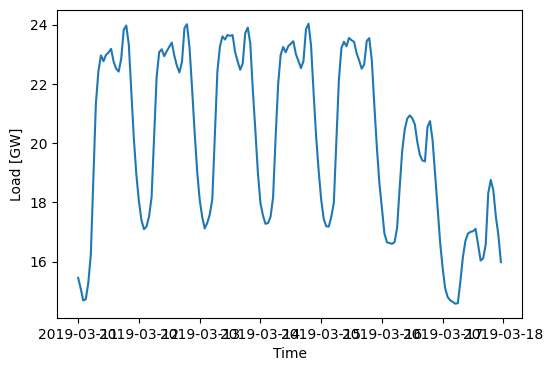

In [17]:
plt.figure(figsize=(6,4))
sns.lineplot(x=df.loc['2019-03-11':'2019-03-17'].index,y='Load [GW]',data=df.loc['2019-03-11':'2019-03-17'])
